In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [21]:
def create_matrix(raw):
    """Create an array of vectors representing the points of each line"""
    my_array = np.array([[],[]])
    for line in raw_data: # ((3, 2), (4, 3)   
        x, y, w, z = *line[0], *line[1] 
        my_array = np.hstack((my_array, [[x, w], [y, z]]))

    return my_array

In [22]:
def find_extremis(matrix):
    """Finding the maximum and minimum x & y coordinates - required to determine the centre
    of the points. This is designated as the centre of rotation"""
    max_x = matrix[0].max()
    min_x = matrix[0].min()
    max_y = matrix[1].max()
    min_y = matrix[1].min()
            
    return np.array([[min_x, max_x], [min_y, max_y]])

In [23]:
def lsplit(matrix):
    """Splits the array of vectors into groups of two; each group of two vectors (points)
    represents one line"""
    mlist = []
    for i in range(0, len(matrix[0]), 2):
        mlist.append(matrix[:, i:i+2])
    return mlist
    

In [24]:
def plot_lines(matrix, ax):
    """Plots series of isolated straight lines"""
    matrices = lsplit(matrix)
    for matrix in matrices: # plotting series of isolated straight lines
        x, y = matrix[0], matrix[1]
        ax.plot(x, y, color='blue')        
    return

In [25]:
def rotater_matrix(angle=0, radians=False):
    """Returns transformation matrix derived from angle of rotation. Assumes the origin to be 
    the centre of rotation. Angle fed in in degrees, negative = clockwise"""
    if radians:
        x = angle
    else:
        x = m.radians(angle)
        
    arr = np.array([m.cos(x), -m.sin(x), m.sin(x), m.cos(x)]).reshape(2, 2)
    return np.around(arr, 2)


In [29]:
def perform_transformation(matrix):
    """Offsets points to origin, performs the rotation by applying the transformation matrix 
    then offsets back to original location space"""
    transformed = matrix.copy()
    extremes = find_extremis(transformed)
    centre_point = (extremes[:,0:1] + extremes[:,1:])/2 # need a variable name for this as it is used again at the end
    transformed -= centre_point
    theta = input('Input angle of rotation. Positive angle indicates anticlockwise rotation: ')
    if theta == '':
        theta = 90  
    else:
        theta = int(theta)
    rotater = rotater_matrix(theta)
    transformed = rotater.dot(transformed)
    transformed += centre_point

    return transformed


In [31]:
raw_data = [[[4.0, 32.0], [8.0, 32.0]],
 [[4.0, 29.0], [4.0, 31.0]],
 [[8.0, 29.0], [8.0, 31.0]],
 [[4.0, 20.0], [8.0, 20.0]],
 [[8.0, 20.0], [8.0, 8.0]],
 [[8.0, 8.0], [4.0, 8.0]],
 [[4.0, 8.0], [4.0, 13.0]],
 [[4.0, 14.0], [4.0, 20.0]],
 [[12.0, 8.0], [12.0, 13.0]],
 [[12.0, 14.0], [12.0, 20.0]],
 [[12.0, 20.0], [16.0, 20.0]],
 [[16.0, 20.0], [16.0, 8.0]],
 [[16.0, 8.0], [12.0, 8.0]],
 [[4.0, 28.0], [8.0, 28.0]]]

Input angle of rotation. Positive angle indicates anticlockwise rotation: 80


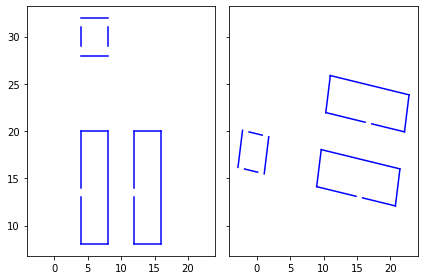

In [30]:
meta = create_matrix(raw_data)
transformed_matrices = perform_transformation(meta)

fig, axes = plt.subplots(sharex=True, sharey=True, nrows=1, ncols=2)

plot_lines(meta, axes[0])
plot_lines(transformed_matrices, axes[1])

plt.tight_layout()